**Тема “Обучение без учителя”**

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
    
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [209]:
from sklearn.datasets import load_boston

In [210]:
boston = load_boston()

In [211]:
data = boston.data

In [212]:
feature_names = boston.feature_names

In [213]:
X = pd.DataFrame(data, columns=feature_names)

In [214]:
y = pd.DataFrame(boston.target, columns=['Price'])

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaler = StandardScaler()

In [218]:
X_train_scaled = scaler.fit_transform(X_train)

In [219]:
X_test_scaled = scaler.transform(X_test)

In [220]:
from sklearn.manifold import TSNE

In [221]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [222]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

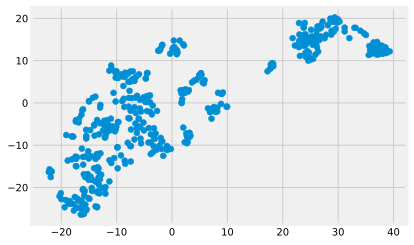

In [223]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [224]:
from sklearn.cluster import KMeans

In [225]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [226]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [227]:
X_train_labels = model.fit_predict(X_train_scaled)

Text(-10, -25, 'Кластер 0')

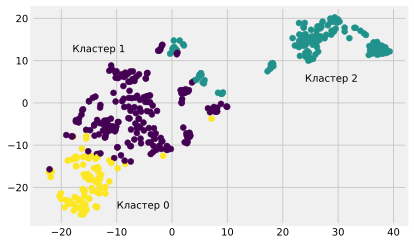

In [228]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_labels)
plt.text(24, 5, 'Кластер 2')
plt.text(-18, 12, 'Кластер 1')
plt.text(-10, -25, 'Кластер 0')

In [229]:
y_train[X_train_labels==0].mean()

Price    24.958115
dtype: float64

In [230]:
y_train[X_train_labels==1].mean()

Price    16.165354
dtype: float64

In [231]:
y_train[X_train_labels==2].mean()

Price    27.788372
dtype: float64

In [232]:
X_train.loc[X_train_labels==0, 'CRIM'].mean()

0.42166020942408367

In [233]:
X_train.loc[X_train_labels==1, 'CRIM'].mean()

10.797028425196853

In [234]:
X_train.loc[X_train_labels==2, 'CRIM'].mean()

0.07356558139534886

*** Задание 3**

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [235]:
# X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [236]:
X_test_labels = model.predict(X_test_scaled)

In [237]:
y_test[X_test_labels==0].mean()

Price    21.860784
dtype: float64

In [238]:
y_test[X_test_labels==1].mean()

Price    16.437143
dtype: float64

In [239]:
y_test[X_test_labels==2].mean()

Price    31.35
dtype: float64

In [240]:
X_test.loc[X_test_labels==0, 'CRIM'].mean()

0.26607882352941176

In [241]:
X_test.loc[X_test_labels==1, 'CRIM'].mean()

10.165531142857143

In [242]:
X_test.loc[X_test_labels==2, 'CRIM'].mean()

0.062060000000000004